In [ ]:
#TO mount the google drive to collab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#setting the directory where we have to download the dataset
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/GOOGLE_COLLAB_NIK/traffic_Pro/model2'

In [ ]:
#changing the working directory
%cd /content/gdrive/MyDrive/GOOGLE_COLLAB_NIK/traffic_Pro/model2


/content/gdrive/MyDrive/GOOGLE_COLLAB_NIK/traffic_Pro/model2


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
ls

kaggle.json  Meta/     model2.ipynb  Test/     train/  Train.csv
meta/        Meta.csv  test/         Test.csv  Train/


In [ ]:
#Required Library

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [ ]:
data = [] #stores the images data
labels = [] # stores the class of each sign
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [ ]:
cur_path

'/content/gdrive/My Drive/GOOGLE_COLLAB_NIK/traffic_Pro/model2'

In [ ]:
#for accessing the data from various folder and combining them into one after resizing and stored into data and labels
for folder in range(classes):
    path = os.path.join(cur_path,'Train',str(folder))
    images = os.listdir(path)
    for img in images:
        try:
            image = Image.open(path + '//'+ img) 
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(folder)
        except Exception as e:
            print(e)

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
os.mkdir('training')    #making training folder in current directory to save the data for future use

np.save('./training/data',data)
np.save('./training/target',labels)

In [ ]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [ ]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
# This is our CNN Model for the traffic sign detection

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))


# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 9, 64)         

In [ ]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/25
981/981 [==============================] - 53s 8ms/step - loss: 3.5080 - accuracy: 0.1774 - val_loss: 0.3890 - val_accuracy: 0.8929
Epoch 2/25
981/981 [==============================] - 7s 7ms/step - loss: 0.6512 - accuracy: 0.8167 - val_loss: 0.1451 - val_accuracy: 0.9607
Epoch 3/25
981/981 [==============================] - 7s 7ms/step - loss: 0.3057 - accuracy: 0.9167 - val_loss: 0.1292 - val_accuracy: 0.9653
Epoch 4/25
981/981 [==============================] - 7s 7ms/step - loss: 0.2262 - accuracy: 0.9401 - val_loss: 0.0990 - val_accuracy: 0.9737
Epoch 5/25
981/981 [==============================] - 6s 6ms/step - loss: 0.1873 - accuracy: 0.9501 - val_loss: 0.0511 - val_accuracy: 0.9866
Epoch 6/25
981/981 [==============================] - 7s 7ms/step - loss: 0.1559 - accuracy: 0.9576 - val_loss: 0.0886 - val_accuracy: 0.9750
Epoch 7/25
981/981 [==============================] - 6s 6ms/step - loss: 0.1964 - accuracy: 0.9514 - val_loss: 0.0630 - val_accuracy: 0.9856
Epoch

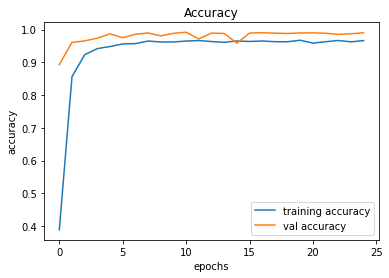

In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

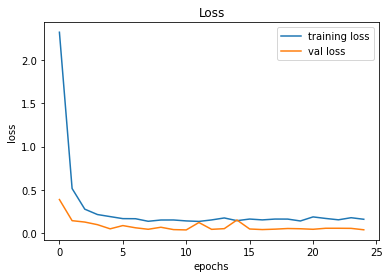

In [ ]:
#Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(X_test,y_test ))

246/246 [==============================] - 1s 3ms/step - loss: 0.0401 - accuracy: 0.9901
[0.04010269418358803, 0.9900535345077515]


In [ ]:
#Testing the model

def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [ ]:
X_test, label = testing('Test.csv')

In [ ]:
Y_pred = model.predict_classes(X_test)   #this is going the predict the class of each images belonging to test set
Y_pred

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ..., 32,  7, 10])

In [ ]:
#accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9639746634996041


In [ ]:
# for the confusion metrix and classification report

from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(label, Y_pred))


[[ 60   0   0 ...   0   0   0]
 [  0 713   2 ...   3   0   0]
 [  0   3 741 ...   0   0   0]
 ...
 [  0   0   0 ...  87   0   0]
 [  0   0   0 ...   0  24   0]
 [  0   0   0 ...   0   0  87]]


In [ ]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(label, Y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      0.981     0.990     0.985       720
           2      0.970     0.988     0.979       750
           3      0.953     0.953     0.953       450
           4      0.983     0.982     0.983       660
           5      0.949     0.979     0.964       630
           6      0.993     0.907     0.948       150
           7      0.995     0.980     0.988       450
           8      0.962     0.962     0.962       450
           9      0.921     1.000     0.959       480
          10      0.994     0.958     0.975       660
          11      0.978     0.955     0.966       420
          12      0.982     0.958     0.970       690
          13      0.978     0.996     0.987       720
          14      0.989     0.996     0.993       270
          15      0.919     0.976     0.947       210
          16      0.980     0.993     0.987       150
          17      0.997    

In [ ]:
model.save("./training/TSR.h5")

In [ ]:
#Load the Model
#import os
#os.chdir(r'/content/gdrive/MyDrive/GOOGLE_COLLAB_NIK/traffic_Pro')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted traffic sign is:  Speed limit (50km/h)


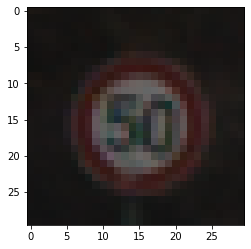

In [ ]:
plot,prediction = test_on_img(r'/content/gdrive/MyDrive/GOOGLE_COLLAB_NIK/traffic_Pro/Test/00067.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()